# Deep learning

>  Deep-learning methods are representation-learning methods with multiple levels of representation, obtained by composing simple but non-linear modules that each transform the representation at one level (starting with the raw input) into a representation at a higher, slightly more abstract level.

---

> The key aspect of deep learning is that these layers of features are not designed by human engineers: they are learned from data using a general-purpose learning procedure

---

> *Deep learning*, Y. LeCun, Y. Bengio, G Hinton, Nature 521 (7553), 436

* There are many deep learning (DL) methods these days, including:

    * convolutional neural networks (CNN) - deep feed-forward neural networks (discussed today)
    
    * recurrent neural networks (RNN) - connections between nodes can go backward (used e.g. for speech recognition)
    
    * generative adversarial networks (GAN) - system of two neural networks competing with each other (one generates fake data and the other compare them with real data)
    
    * and many others...

In [0]:
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

## Convolutional neural networks

* CNN is the type of feed-forward neural networks (neurons are connected only "forward")

* There are several types of layers typically used to construct CNN

    * convolutional
    
    * pooling
    
    * fully connected

### Convolutional layer

* Convolution operation performs dot product between filters and local regions of an input

```
         INPUT       CONVOLUTION    OUTPUT
          
      | 0 1 0 1 1 |
      | 1 1 0 1 0 |   | 1 0 1 |    | ? ? ? |
      | 1 0 1 0 1 | x | 0 1 0 | -> | ? ? ? |
      | 1 1 0 1 0 |   | 1 0 1 |    | ? ? ? |
      | 0 0 1 1 0 |

STEP 1

| [0 1 0] 1 1 |
| [1 1 0] 1 0 |   | 1 0 1 |    | 1*0 0*1 1*0 |   | 0 0 0 |        | 3 - - |
| [1 0 1] 0 1 | x | 0 1 0 | -> | 0*1 1*1 0*0 | = | 0 1 0 | = 3 -> | - - - |
|  1 1 0  1 0 |   | 1 0 1 |    | 1*1 0*0 1*1 |   | 1 0 1 |        | - - - |
|  0 0 1  1 0 |

STEP 2

| 0 [1 0 1] 1 |
| 1 [1 0 1] 0 |   | 1 0 1 |    | 1*1 0*0 1*1 |   | 1 0 1 |        | 3 2 - |
| 1 [0 1 0] 1 | x | 0 1 0 | -> | 0*1 1*0 0*1 | = | 0 0 0 | = 2 -> | - - - |
| 1  1 0 1  0 |   | 1 0 1 |    | 1*0 0*1 1*0 |   | 0 0 0 |        | - - - |
| 0  0 1 1  0 |

...

STEP 9

| 0 1  0 1 1  |
| 1 1  0 1 0  |   | 1 0 1 |    | 1*1 0*0 1*1 |   | 1 0 1 |        | 3 2 4 |
| 1 0 [1 0 1] | x | 0 1 0 | -> | 0*0 1*1 0*0 | = | 0 1 0 | = 2 -> | 2 5 0 |
| 1 1 [0 1 0] |   | 1 0 1 |    | 1*1 0*1 1*0 |   | 1 0 0 |        | 4 1 4 |
| 0 0 [1 1 0] |

```

* Please note, that the output size ($W_{out}$ x $H_{out}$) is determined by the input size ($W_{in}$ x $H_{in}$) and the kernel size ($W_{f}$ x $H_{f}$):

<p align="center"><br>$\begin{eqnarray}
W_{out} & = & W_{in} - W_{f} + 1 \\
H_{out} & = & H_{in} - H_{f} + 1
\end{eqnarray}$</p><br>

* Please note, that input is normalized to $[0, 1]$, but the output is not!

#### Example

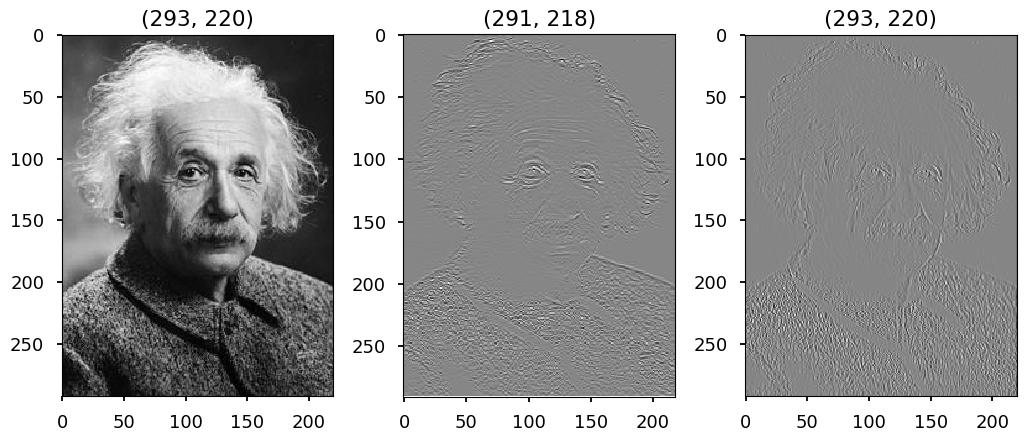

In [2]:
from skimage import io
from scipy.signal import convolve2d

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Albert_Einstein_Head.jpg/220px-Albert_Einstein_Head.jpg"

img = io.imread(url, as_grey=True)

# define first filter
filter01 = np.array([[0,  1, 0],
                     [0, -2, 0],
                     [0,  1, 0]])

# define first filter
filter02 = np.array([[0,  0, 0],
                     [1, -2, 1],
                     [0,  0, 0]])

# apply filters
out01 = convolve2d(img, filter01, mode="valid")
out02 = convolve2d(img, filter02, mode="same")

plt.subplot(131)
plt.title(img.shape)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title(out01.shape)
plt.imshow(out01, cmap='gray')

plt.subplot(133)
plt.title(out02.shape)
plt.imshow(out02, cmap='gray')

plt.tight_layout()

* The first filter found horizontal edges

* The second one found vertical edges, and also kept the original size of the input image

#### Padding

* Padding (zero padding) - adding zeros around an image

```              
                 | 0 0 0 0 0 0 0 |
| 0 1 0 1 1 |    | 0 0 1 0 1 1 0 |
| 1 1 0 1 0 |    | 0 1 1 0 1 0 0 |
| 1 0 1 0 1 | -> | 0 1 0 1 0 1 0 |
| 1 1 0 1 0 |    | 0 1 1 0 1 0 0 |
| 0 0 1 1 0 |    | 0 0 0 1 1 0 0 |
                 | 0 0 0 0 0 0 0 |
```

* The output size ($W_{out}$ x $H_{out}$) is determined by the input size ($W_{in}$ x $H_{in}$), the kernel size ($W_{f}$ x $H_{f}$), and the padding size ($P$)

<p align="center"><br>$\begin{eqnarray}
W_{out} & = & W_{in} - W_{f} + 2P+ 1 \\
H_{out} & = & H_{in} - H_{f} + 2P + 1
\end{eqnarray}$</p><br>

#### Stride

* Stride controls the movement of the filter

```
Stride = 1

| [0 1 0] 1 1 |    | 0 [1 0 1] 1 |
| [1 1 0] 1 0 |    | 1 [1 0 1] 0 |
| [1 0 1] 0 1 | -> | 1 [0 1 0] 1 | -> ...
|  1 1 0  1 0 |    | 1  1 0 1  0 |
|  0 0 1  1 0 |    | 0  0 1 1  0 |

Stride = 2

| [0 1 0] 1 1 |    | 0 1 [0 1 1] |
| [1 1 0] 1 0 |    | 1 1 [0 1 0] |
| [1 0 1] 0 1 | -> | 1 0 [1 0 1] | -> ...
|  1 1 0  1 0 |    | 1 1  0 1 0  |
|  0 0 1  1 0 |    | 0 0  1 1 0  |

```

* The output size ($W_{out}$ x $H_{out}$) is determined by the input size ($W_{in}$ x $H_{in}$), the kernel size ($W_{f}$ x $H_{f}$),  the padding size ($P$), and the stride size ($W_{s}$ x $H_{s}$)

<p align="center"><br>$\begin{eqnarray}
W_{out} & = & \frac{W_{in} - W_{f} + 2P}{W_{s}}+ 1 \\
H_{out} & = & \frac{H_{in} - H_{f} + 2P}{H_{s}} + 1
\end{eqnarray}$</p><br>

#### Summary

* Convolutional layer consist of $N$ filters, so the hyperparameters are:

    * the number of filters
    
    * the size of the filters
    
    * padding
    
    * stride

### Pooling

* Pooling reduces the size of the input by taking `max` or `avg` of given part of the data

* Usually, 2x2 max pooling with stride 2 is used (output size = input size / 2)

```
Max pooling 2x2, stride = 2

| [1 2] 3 4 |    
| [5 6] 7 8 |    | 6 - |
|  0 9  1 2 | -> | - - |
|  3 4  5 6 |

| 1 2 [3 4] |    
| 5 6 [7 8] |    | 6 8 |
| 0 9  1 2  | -> | - - |
| 3 4  5 6  |

|  1 2  3 4 |    
|  5 6  7 8 |    | 6 8 |
| [0 9] 1 2 | -> | 9 - |
| [3 4] 5 6 |

| 1 2  3 4  |    
| 5 6  7 8  |    | 6 8 |
| 0 9 [1 2] | -> | 9 6 |
| 3 4 [5 6] |
```

#### Example

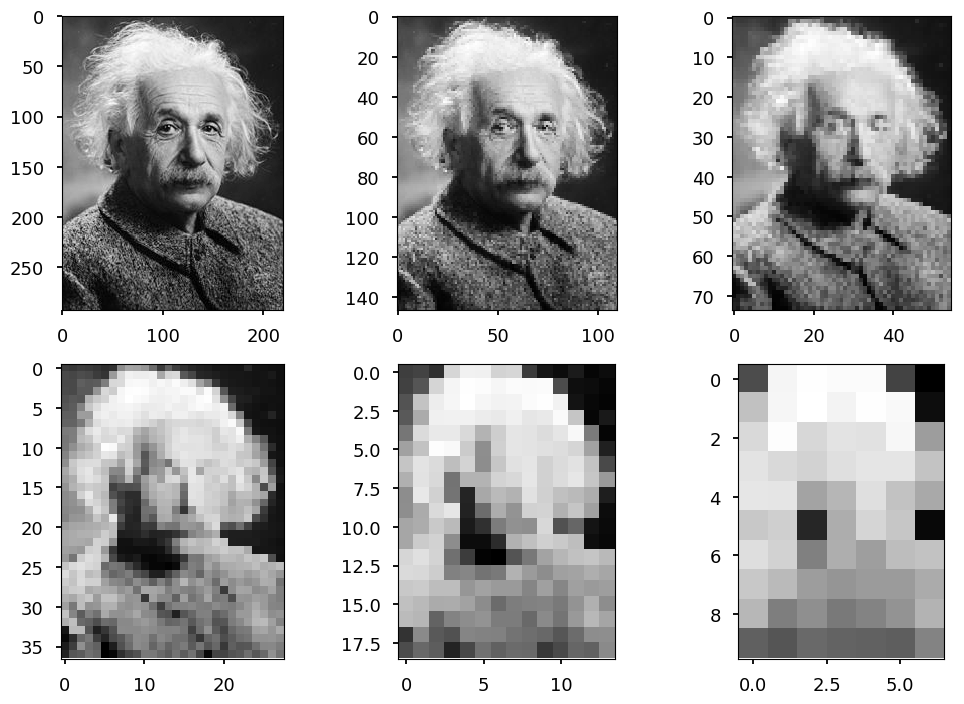

In [93]:
from skimage.measure import block_reduce

images = [img]

# perform 5 poolings
for i in range(5):
  images.append(block_reduce(images[-1], (2, 2), np.max))

# plot them all
for i in range(6):
  plt.subplot(231 + i)
  plt.imshow(images[i], cmap='gray')
  
plt.tight_layout()

### CNN structure

* Typical structure of convolutional neural network (src: [wildml.com](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/))

![](http://tomaszgolan.github.io/reveal_talks/img/ml/cnn_example.png)

* But it may go deeper:

![](http://tomaszgolan.github.io/reveal_talks/img/ml/googlenet.png)

* The first reference from the paper:

> [1] Know your meme: We need to go deeper.

![](http://tomaszgolan.github.io/reveal_talks/img/ml/need_deep.jpg)

### Backpropagation

* Filter weights are updated using (as for fully connected layers) backpropagation algorithm

* Consider input 3x3, filter 2x2, stride 1, no padding

* The forward pass looks like this

<p align="center"><br>$
\left[\begin{array}{ccc}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{array}\right]\odot
\left[\begin{array}{cc}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{array}\right] =
\left[\begin{array}{cc}
h_{11} & h_{12} \\
h_{21} & h_{22}
\end{array}\right]
$</p><br>

<p align="center"><br>$
\begin{eqnarray}
h_{11} & = & w_{11}x_{11} + w_{12}x_{12} + w_{21}x_{21} + w_{22}x_{22} \\
h_{12} & = & w_{11}x_{12} + w_{12}x_{13} + w_{21}x_{22} + w_{22}x_{23} \\
h_{21} & = & w_{11}x_{21} + w_{12}x_{22} + w_{21}x_{31} + w_{22}x_{32} \\
h_{22} & = & w_{11}x_{22} + w_{12}x_{23} + w_{21}x_{32} + w_{22}x_{33}
\end{eqnarray}
$</p><br>

* And the backward pass ($\partial w_{ij} \equiv \frac{\partial L}{\partial w_{ij}}$ and $\partial h_{ij} \equiv \frac{\partial L}{\partial h_{ij}}$ )

<p align="center"><br>$
\begin{eqnarray}
\partial w_{11} & = & \partial h_{11}x_{11} + \partial h_{12}x_{12} + \partial h_{21}x_{21} + \partial h_{22}x_{22} \\
\partial w_{12} & = & \partial h_{11}x_{12} + \partial h_{12}x_{13} + \partial h_{21}x_{22} + \partial h_{22}x_{23} \\
\partial w_{21} & = & \partial h_{11}x_{21} + \partial h_{12}x_{22} + \partial h_{21}x_{31} + \partial h_{22}x_{32} \\
\partial w_{22} & = & \partial h_{11}x_{22} + \partial h_{12}x_{23} + \partial h_{21}x_{32} + \partial h_{22}x_{33}
\end{eqnarray}
$</p><br>

### Dropout

* Very often convolution layers (with or without pooling) are followed by fully connected layers

* Note, that most weights live in fully connected layers, but convolutions are computationally more expensive

* **Dropout** is a common technique of regularization 

* Note, that it should be used together with other methods like L1 of or L2 regularizations

* Dropout deactivates random set of neurons during training phase (usually about 50%)

* This improves generalization - force different neurons to learn the same *concept*

* Usually, dropout is applied to fully connected layers

## Deep MNIST 

* Last week we got about 92% accuracy on MNIST dataset

* Today we are going to do better with CNN

* First, lets load the data

In [20]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# to avoid warnings printed in the notebook
tf.logging.set_verbosity(tf.logging.ERROR)

# one hot -> label 0-9 -> 0...01, 0...10, ...
mnist = input_data.read_data_sets("/tmp/", one_hot=True)

Extracting /tmp/train-images-idx3-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


* Create placeholders for tensors to fed

In [0]:
x = tf.placeholder(tf.float32, [None, 784])  # img -> 28x28 -> 784
y = tf.placeholder(tf.float32, [None, 10])   # 10 classes

* Build the network

In [0]:
# reshape to 28x28 image with 1 color channel
x_image = tf.reshape(x, [-1, 28, 28, 1])

##### The first convolution (conv1) with 32 filters 5x5 #####

# init weights randomly from normal distribution with bounds
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))

# init bias with 0.1
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# create convolution
# input tensor has 4 dimensions: [batch, height, width, channels]
# strides defines how to move in each dimension
# padding = "SAME" (zero padding) or "VALID" (no padding)
conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')

# ReLU activation funtion
h_conv1 = tf.nn.relu(conv1 + b_conv1)

# pooling layer 2x2 with stride 2
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1], padding='SAME')

##### The second convolutional layer - maps 32 feature maps to 64 #####

W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

# last pooling layer is an input for this layer
conv2 = tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')
h_conv2 = tf.nn.relu(conv2 + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1], padding='SAME')

# Convolution is done with zero padding - preserves image size
# Each pooling downsamples by 2x
# 28x28 -> 14x14x32 -> 7x7x64

###### Fully connected layer maps above to 1024 features #####

W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))

# we need to reshape last layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])

# matmul - matrix multiplication
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

##### Dropout layer #####

# keep_prob controls no. of deactivated neurons
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

##### Output layer #####

# Map the 1024 features to 10 classes, one for each digit
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

out = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

* Before training we need to define:

    * loss function
    
    * learning algorithm

In [0]:
# loss function
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=out))

# training step - using Adam SGD with initial learning rate 1e-4
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

* For convenience we define a method to measure accuracy

In [0]:
# argmax returns the index of the heighest index in a tensor
# equal returns True / False if prediction is equal/not equal to true label
# cast would convert True/False to 1/0, so we can calculate the average
correct_prediction = tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

* Make sure we are running on GPU

In [25]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


* Finally we can train the network on MNIST dataset

In [49]:
# to use GPU through Colaboratory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

nof_iterations = 20000 # number of training steps
test_every = 1000      # calculate accuracy every test_every step
batch_size = 32        # traning batch size
acc_batch = 2048       # the size of a subset used to measure accuracy

train_accuracy = []
valid_accuracy = []

with tf.Session(config=config) as sess:
  # initialize weights and biases
  sess.run(tf.global_variables_initializer())

  for i in range(nof_iterations):
    # take mini batch from MNIST dataset
    batch = mnist.train.next_batch(batch_size)
    
    # every test_every iterations save current accuracy scores
    if i % test_every == 0:
      # for testing we do not want dropout neurons - keep_prob = 1
      # to save time we calculate accuracy on a subset of data
      
      train_batch = mnist.train.next_batch(acc_batch)
      train_accuracy.append(accuracy.eval(
          feed_dict={x: train_batch[0], y: train_batch[1], keep_prob: 1.0}))
      
      test_batch = mnist.test.next_batch(acc_batch)
      valid_accuracy.append(accuracy.eval(
          feed_dict={x: test_batch[0], y: test_batch[1], keep_prob: 1.0}))

    # run training step with 50% neurons deactivated
    train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})
    
  # calculate the accuracy on the whole testing dataset
  print('test accuracy %g' % accuracy.eval(
      feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9915


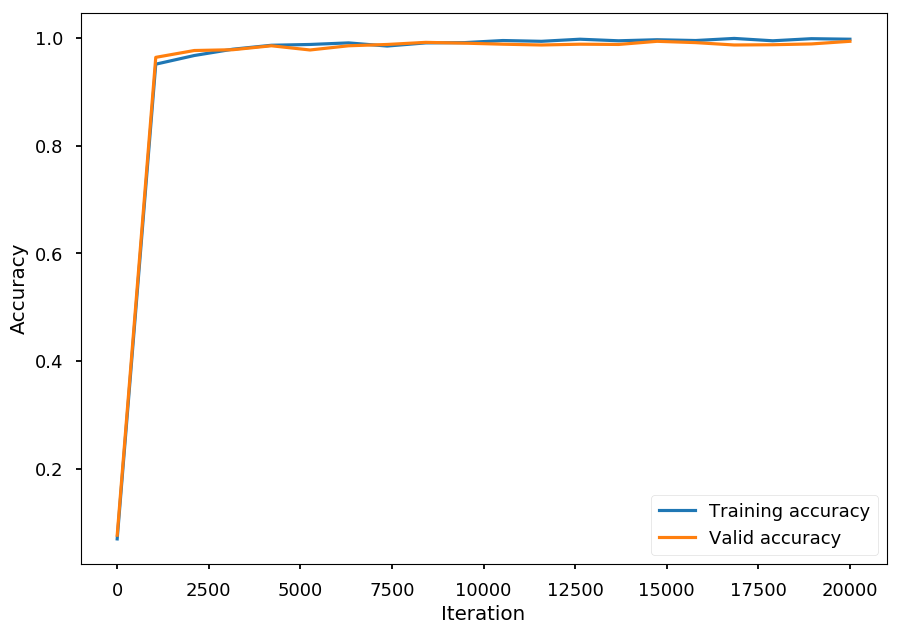

In [50]:
iterations = np.linspace(0, nof_iterations, nof_iterations // test_every)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.plot(iterations, valid_accuracy, label='Valid accuracy')

plt.legend();

## Batch normalization

* As discussed before, usually data preprocessing includes data normalization (or feature scaling)

* Let $x$ be a feature vector:

    * rescaling: $\hat x = \frac{x - \min(x)}{\max(x) - \min(x)}$
    
    * standarization: $\hat x = \frac{x - \text{mean}(x)}{\sigma}$, where $\sigma$ - standard deviation
    
    * ...
    
* Normalization (usually) helps to train the network

* It does not mean, that you would always normalize your data. Consider developing an algorithm to recognize cars on a picture and having training photos with cars in daylight and nightlight:

    * Scenario 1: the goal is to just recognize a car - data can be normalized, so the network does not have to learn the difference between day and night
    
    * Scenario 2: the additional goal is distinguish photos of cars at night and during the day - data should not be normalized as you lose valuable information
    
* Similarly, one can normalize the output of hidden layer to increase stability of a network

### BN layer

* The idea is to make activations unit gaussian by scaling the input $x$

* Let $X = \{x_1, \cdots, x_N\}$ be a batch of $D$-dimensional vectors

* We define *mini-batch mean* and *mini-batch variance*:

<p align="center"><br>$
\begin{eqnarray}
\mu & = & \frac{1}{N}\sum\limits_{i=1}^{N}x_i \\
\sigma^2 & = & \frac{1}{N}\sum\limits_{i=1}^{N}\left(x_i - \mu\right)^2
\end{eqnarray}
$</p><br>

* Note, that $\mu, \sigma^2 \in\mathcal{R}^D$

* And normalized input: <p align="center"><br>$\hat x_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \varepsilon}}$</p><br>

* Where $\varepsilon << 1$ is just to ensure denominator not equal zero

* Please note, that in the original paper the mean and the variance are calculated:

    * for batch (training)
    
    * for the whole training dataset (inference)

* BN layer is usually put after fully connected layer (or convolution), e.g.

```
   |----|    |----|    |------|    |----|    |----|
-> | FC | -> | BN | -> | tanh | -> | FC | -> | BN | -> ... 
   |----|    |----|    |------|    |----|    |----|
```

* The problem is - do we really a unit gaussian input for `tanh`?

* The idea - let the network to squash the range if it wants to: <p align="center"><br>$y_i = \gamma \hat x_i + \beta$</p><br>

* Where $\gamma$, $\beta$ are trainable parameters

* Note, that the network can learn:

<p align="center"><br>$
\begin{eqnarray}
\gamma & = & \sqrt{\sigma^2} \\
\beta & = & \mu
\end{eqnarray}
$</p><br>

* to recover the original activation!

* Thus, we say "I normalized input for you, but feel free to undo this if you want to"

* In order to use BN in backpropgation scheme one needs to calculate:

    * $\frac{\partial L}{\partial \gamma}$ to perform SGD on $\gamma$
    
    * $\frac{\partial L}{\partial \beta}$ to perform SGD on $\beta$
    
    * $\frac{\partial L}{\partial x_i}$ to pass on the gradient signal to lower layers
    
* which it not a problem since $\hat x_i$ is differentiable function

## Data augmentation

* Data augmentation is used to increase the number of training samples

* The common methods for image data augmenation are:

    * flipping
    
    * rotation
    
    * translation
    
    * scaling
    
    * adding noise
    
    * ...
    
* The goal is to make the network invariant to given tranformations

* E.g. if the goal is to find a car on a picture it does not matter how it is oriented, what is its position or color etc 

### Flipping

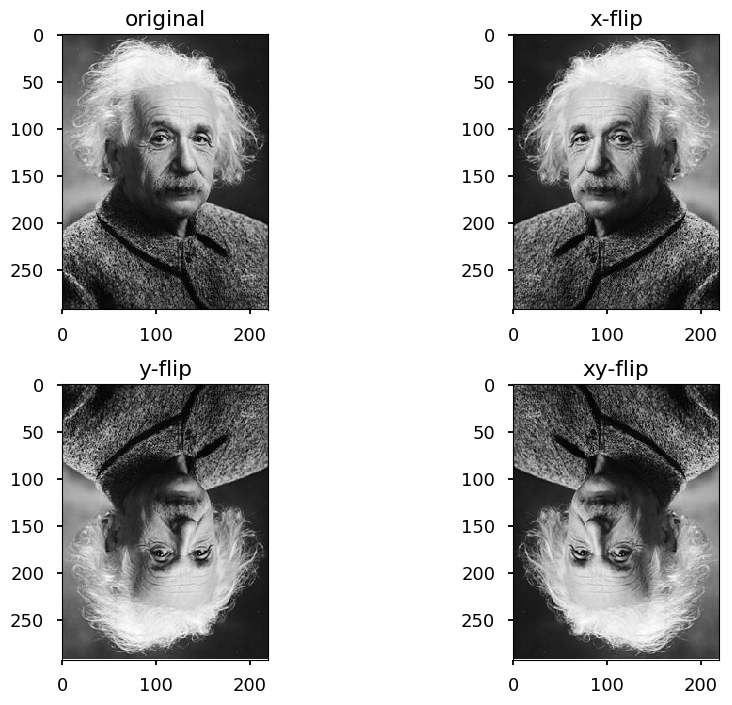

In [8]:
img_flip_x = np.flip(img, axis=1)
img_flip_y = np.flip(img, axis=0)
img_flip_xy = np.flip(img_flip_y, axis=1)

plt.subplot(221)
plt.title('original')
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.title('x-flip')
plt.imshow(img_flip_x, cmap='gray')

plt.subplot(223)
plt.title('y-flip')
plt.imshow(img_flip_y, cmap='gray')

plt.subplot(224)
plt.title('xy-flip')
plt.imshow(img_flip_xy, cmap='gray')

plt.tight_layout()

### Rotation

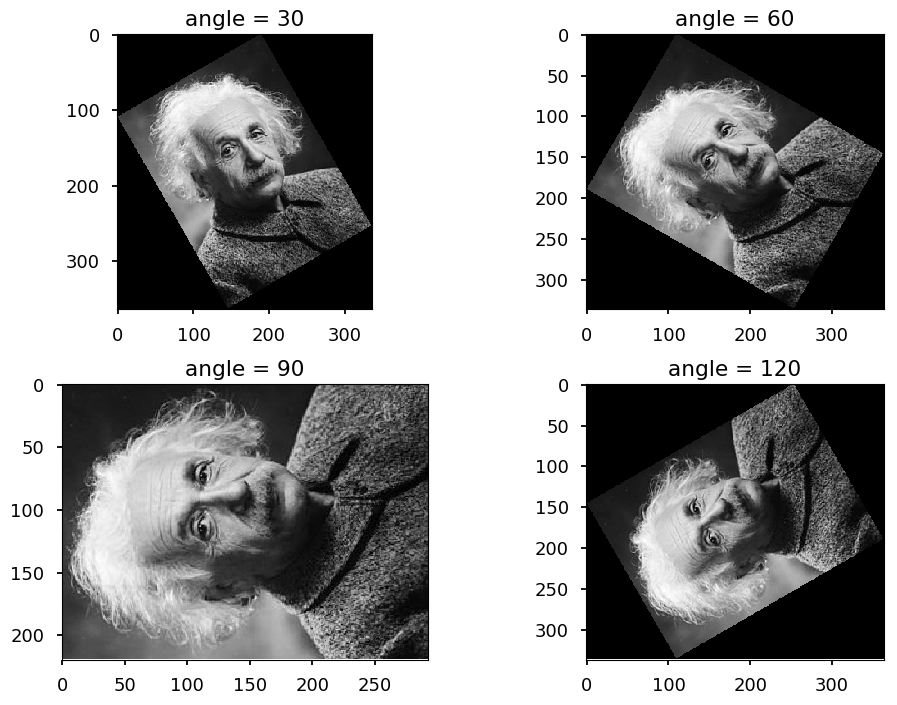

In [11]:
from scipy.ndimage.interpolation import rotate

for i, angle in enumerate((30, 60, 90, 120)):
  img_rot = rotate(img, angle=angle)
  plt.subplot(221+i)
  plt.title("angle = {}".format(angle))
  plt.imshow(img_rot, cmap='gray')

plt.tight_layout()

* Note, that rotations may cause extra background (if not multiplicity of $90^0$)

* This may or may not be a problem

* Also, rotated images habe different dimensions than the original one, so one need to crop it

### Translation

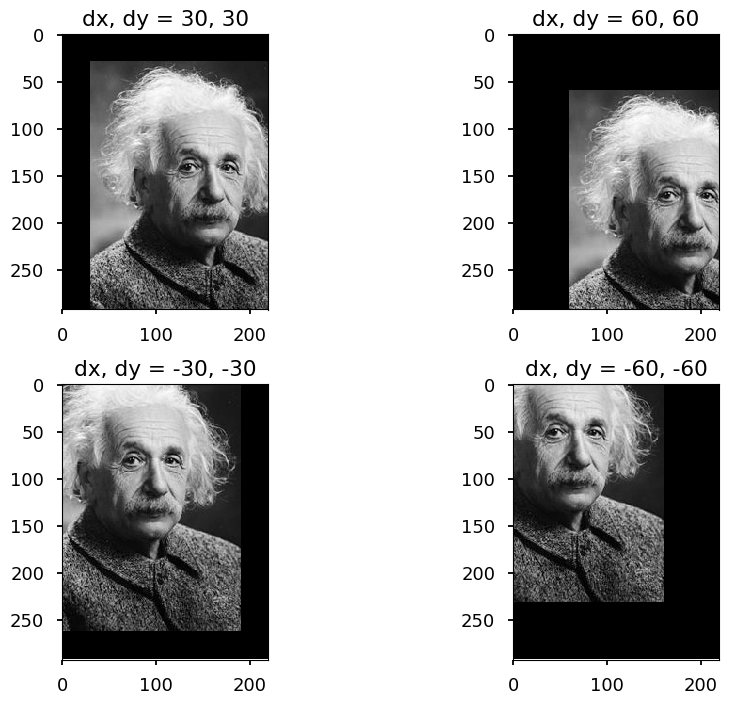

In [11]:
from scipy.ndimage.interpolation import shift

for i, (dx, dy) in enumerate(((30, 30), (60, 60), (-30, -30), (-60, -60))):
  img_trans = shift(img, (dx, dy))
  plt.subplot(221+i)
  plt.title("dx, dy = {}, {}".format(dx, dy))
  plt.imshow(img_trans, cmap='gray')

plt.tight_layout()

### Scaling

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


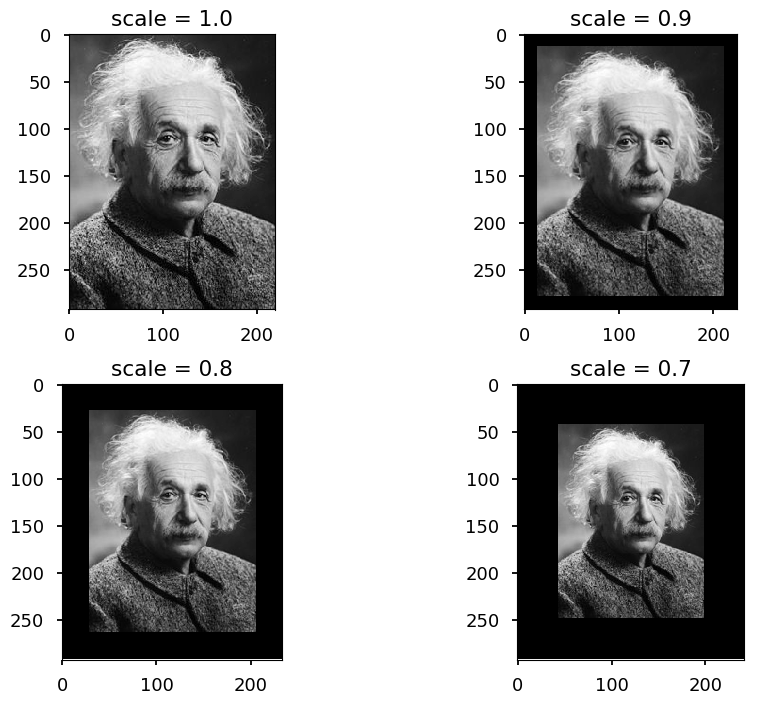

In [41]:
from skimage.transform import rescale

for i, scale in enumerate((1., 0.9, 0.8, 0.7)):
  img_scaled = rescale(img, scale).copy()
  img_scaled = np.pad(img_scaled, (img.shape[0] - img_scaled.shape[0])//2, mode="constant")
  plt.subplot(221+i)
  plt.title("scale = {}".format(scale))
  plt.imshow(img_scaled, cmap='gray')

plt.tight_layout()

### Noise

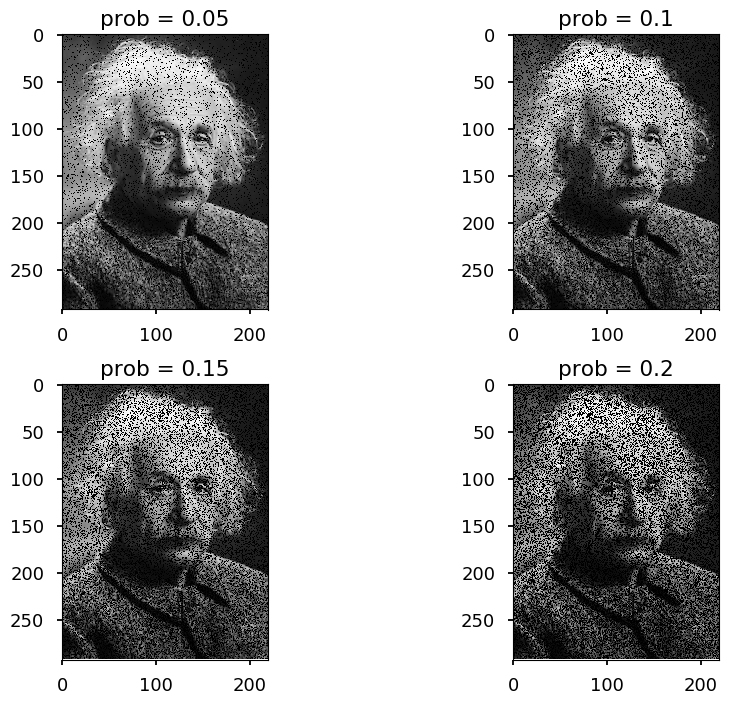

In [50]:
# salt and pepper noise
for i, prob in enumerate((0.05, 0.10, 0.15, 0.20)):
  img_noised = img.copy()
  rnd = np.random.rand(img.shape[0], img.shape[1])
  img_noised[rnd < prob] = 0      # pepper
  img_noised[rnd > 1 - prob] = 1  # salt
  plt.subplot(221+i)
  plt.title("prob = {}".format(prob))
  plt.imshow(img_noised, cmap='gray')

plt.tight_layout()

## Summary

* As we do not have more time, we can not go deeper

* CNN are just an example of deep learning method

* However, very useful / successful in

    * image classification
    
    * object detection (R-CNN, Fast R-CNN, Faster R-CNN, Yolo, ...)
    
    * generating images (GAN, Cycle-GAN, ....)
    
    ...
    
* Deep learning field is growing fast these days and many interesting approaches appear every month

* The big advantage of DL is reducing feature engineering, but you need a lot of data and may end up with "hyperparameter engineering"

* The goal of these lectures was to give you the general idea about ML/DL methods

* and to understand this meme

![math_vs_ai](https://pbs.twimg.com/media/DI2UpXWXYAA_eJg.jpg)